# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(citipy)

<module 'citipy.citipy' from '/Users/neelashivakumar/Documents/GitHub/Python-APIs-Homework/citipy/citipy.py'>


## Generate Cities List

In [2]:
today = f"{datetime.datetime.now():%m/%d/%y}"
print (today)

12/22/18


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [5]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | dunedin
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | quatre cocos
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | manzanillo
Processing Record 16 of Set 1 | worthington
City not found. Skipping...
Processing Record 17 of Set 1 | shenavan
City not found. Skipping...
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | mitsamiouli
Processing Record 20 of Set 1 | vanimo
City not found. Skipping...
Processing Record 21 of Set 1 | hilo
Process

Processing Record 184 of Set 1 | hofn
Processing Record 185 of Set 1 | nizwa
Processing Record 186 of Set 1 | manama
Processing Record 187 of Set 1 | kahului
Processing Record 188 of Set 1 | adrar
Processing Record 189 of Set 1 | moshny
Processing Record 190 of Set 1 | curuguaty
Processing Record 191 of Set 1 | pampa
City not found. Skipping...
Processing Record 192 of Set 1 | avanigadda
Processing Record 193 of Set 1 | kisangani
Processing Record 194 of Set 1 | codrington
Processing Record 195 of Set 1 | beloha
Processing Record 196 of Set 1 | aykhal
Processing Record 197 of Set 1 | shellbrook
Processing Record 198 of Set 1 | moussoro
Processing Record 199 of Set 1 | meru
Processing Record 200 of Set 1 | salinas
Processing Record 201 of Set 1 | soyo
Processing Record 202 of Set 1 | okhotsk
Processing Record 203 of Set 1 | boa vista
Processing Record 204 of Set 1 | huadian
Processing Record 205 of Set 1 | kirando
Processing Record 206 of Set 1 | lata
Processing Record 207 of Set 1 | sa

Processing Record 364 of Set 1 | gambela
Processing Record 365 of Set 1 | mayumba
City not found. Skipping...
Processing Record 366 of Set 1 | sola
Processing Record 367 of Set 1 | saint anthony
Processing Record 368 of Set 1 | ponta do sol
Processing Record 369 of Set 1 | caucaia
Processing Record 370 of Set 1 | sakaiminato
City not found. Skipping...
Processing Record 371 of Set 1 | humboldt
Processing Record 372 of Set 1 | sainte-marie
Processing Record 373 of Set 1 | marzuq
Processing Record 374 of Set 1 | punta alta
Processing Record 375 of Set 1 | salalah
City not found. Skipping...
City not found. Skipping...
Processing Record 376 of Set 1 | aginskoye
Processing Record 377 of Set 1 | lodja
Processing Record 378 of Set 1 | gvarv
Processing Record 379 of Set 1 | auki
Processing Record 380 of Set 1 | bonavista
Processing Record 381 of Set 1 | tolbazy
Processing Record 382 of Set 1 | pirovskoye
City not found. Skipping...
Processing Record 383 of Set 1 | linjiang
City not found. Ski

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

# print lengh of each list 
print(f'City          {len(City)}')
print(f'Cloudiness    {len(Cloudiness)}')
print(f'Country    {len(Country)}')
print(f'Date    {len(Date)}')
print(f'Humidity    {len(Humidity)}')
print(f'Lat    {len(Lat)}')
print(f'Lng    {len(Lng)}')
print(f'Max Temp    {len(Max_Temp)}')
print(f'Wind Speed    {len(Wind_Speed)}')

City          535
Cloudiness    535
Country    535
Date    535
Humidity    535
Lat    535
Lng    535
Max Temp    535
Wind Speed    535


In [7]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,12,RU,1545539653,0,71.97,114.09,-40.77,4.21
1,Klyuchi,76,RU,1545539654,76,52.25,79.17,-17.77,2.46
2,Punta Arenas,0,CL,1545537600,75,-53.16,-70.91,7.00,8.20
3,Dunedin,0,NZ,1545539523,73,-45.87,170.50,14.91,4.16
4,Jamestown,0,AU,1545539654,27,-33.21,138.60,28.29,1.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

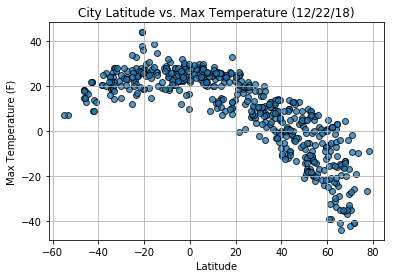

In [8]:
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(Lat, Max_Temp, marker="o", alpha=.75, edgecolors="k")
plt.savefig('max_temperature')
plt.grid()
plt.show()


#### Latitude vs. Humidity Plot

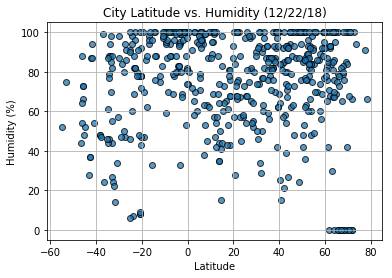

In [9]:
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.scatter(Lat, Humidity, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()


#### Latitude vs. Cloudiness Plot

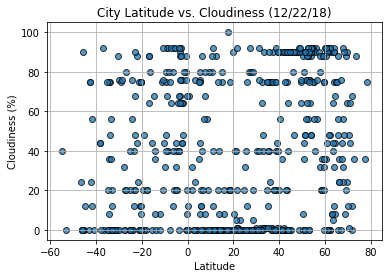

In [10]:
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.scatter(Lat, Cloudiness, marker="o", alpha=.75, edgecolors="k")
plt.grid()
plt.show()


#### Latitude vs. Wind Speed Plot

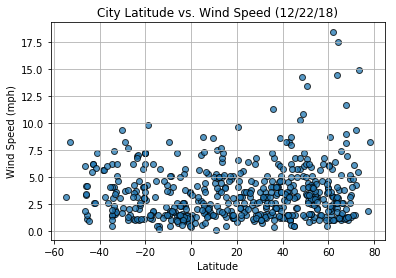

In [11]:
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.scatter(Lat, Wind_Speed, alpha=.75, edgecolors="k")
plt.grid()
plt.show()
